In [1]:
#%matplotlib widget
import sys
sys.path.append("../../..")
from pyfitit.factor_analysis import *

In [2]:
file_name='PtH.dat'
folder='results'

xanes=Dataset(np.loadtxt(file_name),folder_to_save=folder)
pca=PCA(folder_to_save=folder)

## Range Selection

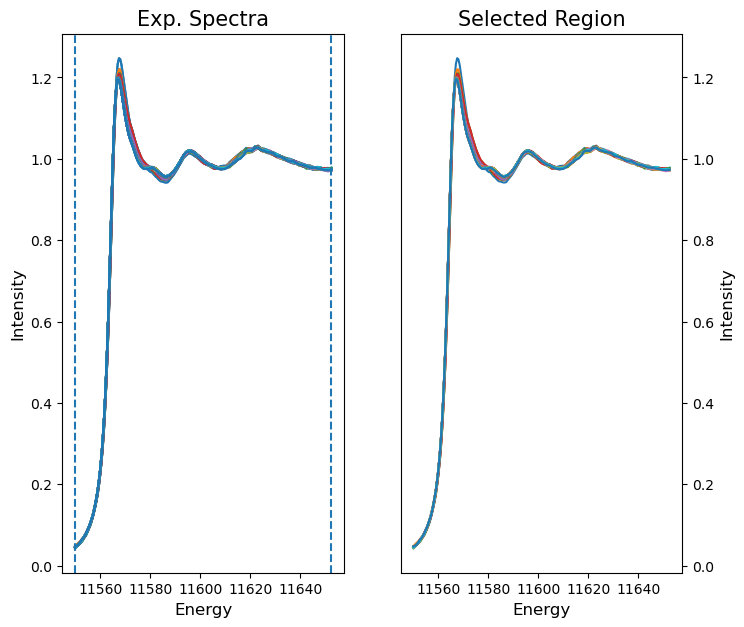

Output()

In [4]:
xanes.selectRange()

## Abstract Component Analysis

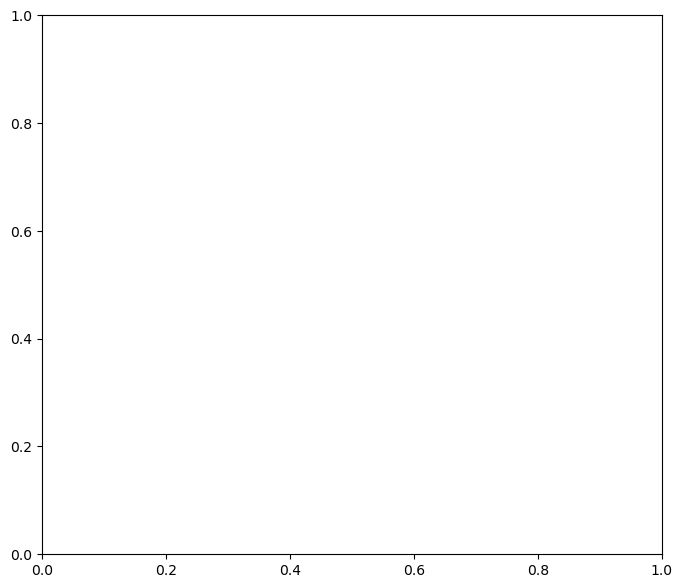

Output()

Output()

Output()

In [5]:
pca.componentAnalysis(xanes.energy,xanes.intensity)

## PCA Fit

In [ ]:
pca.pcaFit(xanes.energy,xanes.intensity)

## Histogram Trend

In [ ]:
pca.rfactorTrend(xanes.intensity)

## Statistical Analysis

In [ ]:
pca.getStatistic(xanes.intensity)

## Transformation Matrix Approach

### XANES interpolation and Normalization
For the application of the mass balance condition in the Transformation Matrix decomposition use a finer energy grid (e.g. energy step of 0.05 or lower) and normalize the xanes.

In [ ]:
xanes.manipulateXanes(minVal=0.01,maxVal=0.1,stepVal=0.01)

### Guess the transformation matrix

In [ ]:
pca.guessTransformationMatrix(xanes.manipulated_energy,xanes.manipulated_intensity,npc=2)

### References selection

In [ ]:
xanes.setReferences(xanes.manipulated_energy,xanes.manipulated_intensity,npc=3)

### Transformation Matrix Decomposition
If you want to use the references selected in the precedent cell, substitute references=None with references=xanes.references.

In [ ]:
#pca.transformationMatrix(xanes.manipulated_energy,xanes.manipulated_intensity,npc=3,references=None,minVal=-5,maxVal=5)
pca.transformationMatrix(xanes.manipulated_energy,xanes.manipulated_intensity,npc=3,references=xanes.references,minVal=-5,maxVal=5)